In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from flair.models import TextClassifier
from flair.data import Sentence
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
from scipy.stats import norm

c:\Users\KDP15\anaconda3\envs\PY39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
data=pd.read_csv('Sentiment1.csv')

In [4]:
# VADER 분석기 초기화
vader_analyzer = SentimentIntensityAnalyzer()

# Flair 분석기 초기화
flair_classifier = TextClassifier.load('en-sentiment')

# VADER를 사용한 감정 분석 함수
def vader_sentiment(text):
    sentiment_dict = vader_analyzer.polarity_scores(text)
    return sentiment_dict['compound']

# Flair를 사용한 감정 분석 함수
def flair_sentiment(text):
    sentence = Sentence(text)
    flair_classifier.predict(sentence)
    sentiment_score = sentence.labels[0].score
    return sentiment_score if sentence.labels[0].value == 'POSITIVE' else -sentiment_score

# 샘플 데이터에 대해 VADER와 Flair로 감정 분석 수행
data['VADER_Title_score'] = data['Title'].apply(vader_sentiment)
data['VADER_Review_score'] = data['Review_Content'].apply(vader_sentiment)
data['Flair_Title_score'] = data['Title'].apply(flair_sentiment)
data['Flair_Review_score'] = data['Review_Content'].apply(flair_sentiment)

# 결과 데이터프레임 미리보기
comparison_df = data[['Title', 'Review_Content', 'VADER_Title_score', 'VADER_Review_score', 'Flair_Title_score', 'Flair_Review_score']]

2024-08-22 22:56:47,643 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to C:\Users\KDP15\AppData\Local\Temp\tmppco6mz1w


100%|██████████| 253M/253M [02:06<00:00, 2.09MB/s]   

2024-08-22 22:58:55,578 copying C:\Users\KDP15\AppData\Local\Temp\tmppco6mz1w to cache at C:\Users\KDP15\.flair\models\sentiment-en-mix-distillbert_4.pt
2024-08-22 22:58:55,758 removing temp file C:\Users\KDP15\AppData\Local\Temp\tmppco6mz1w


In [1]:
data.to_csv('Sentiment1.csv', index=False)

NameError: name 'data' is not defined

In [5]:
comparison_df

,Title,Review_Content,VADER_Title_score,VADER_Review_score,Flair_Title_score,Flair_Review_score
0,Overpriced dissapointment,Dull taste. High price. No finish. Over-hyped ...,0.0000,-0.7964,-0.999703,-0.999993
1,Delicious,Delicious! sugared red fruits and sweet with a...,0.5719,0.7901,0.998251,0.999928
2,Good for beginners. i know cos i am a beginner,I am not a whisky expert but i really love the...,0.4404,0.9854,0.939995,0.999923
3,Yamazaki Tutorial,"This is a terrible Yamazaki. Very young, unsh...",0.0000,0.9582,0.960594,-0.999986
4,Very Nice,First time and I like it - fresh but not thin ...,0.4754,0.8771,0.960956,0.999967
...,...,...,...,...,...,...
1125,Great whisky,Really enjoyed the flavour of this whisky... G...,0.6249,0.8268,0.996735,0.995257
1126,Phenomenal.,Given the slightly racist tone to the guy at t...,0.0000,-0.0074,0.997774,0.999980
1127,Great.,The particular distillation process makes this...,0.6249,0.8439,0.994434,0.999689
1128,"It's whisky, not wine",That's probably why the previous poster though...,0.0000,-0.1695,-0.899139,-0.999980


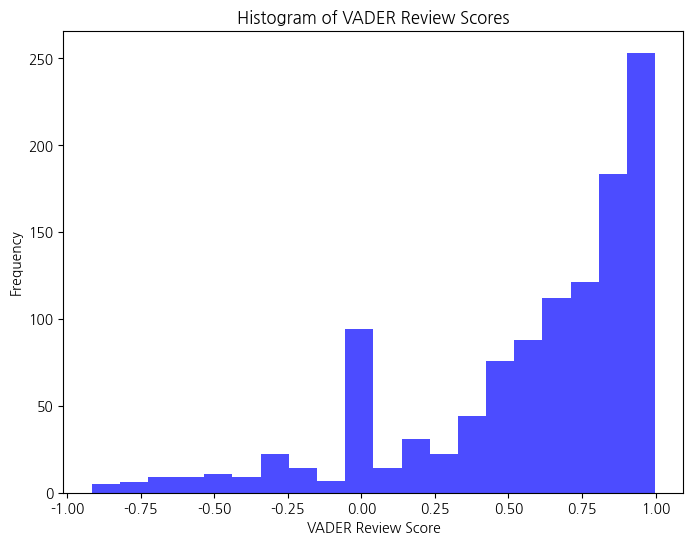

In [10]:
# VADER_Review_score 기준 히스토그램 그리기
plt.figure(figsize=(8, 6))
plt.hist(data['VADER_Review_score'], bins=20, alpha=0.7, color='blue')
plt.title('Histogram of VADER Review Scores')
plt.xlabel('VADER Review Score')
plt.ylabel('Frequency')
plt.show()

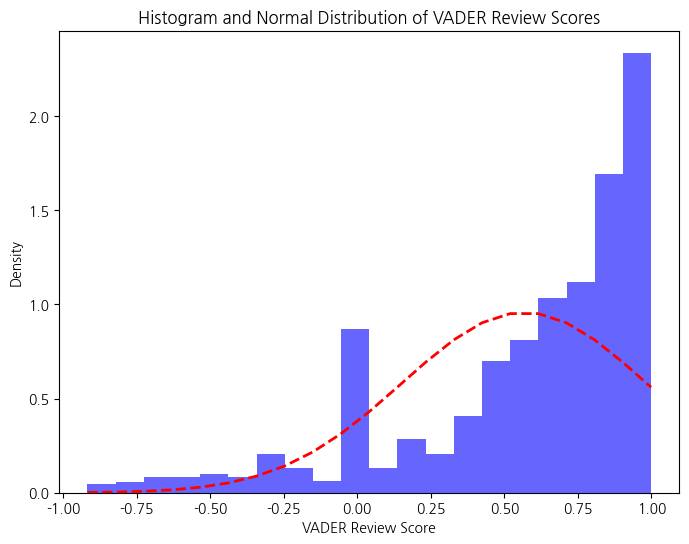

In [13]:
vader_review_scores = comparison_df['VADER_Review_score']

# 히스토그램 그리기
plt.figure(figsize=(8, 6))
count, bins, ignored = plt.hist(vader_review_scores, bins=20, density=True, alpha=0.6, color='blue')

# 정규분포 곡선 그리기
mu, std = norm.fit(vader_review_scores)  # 평균과 표준편차 계산
plt.plot(bins, norm.pdf(bins, mu, std), 'r--', linewidth=2)

plt.title('Histogram and Normal Distribution of VADER Review Scores')
plt.xlabel('VADER Review Score')
plt.ylabel('Density')
plt.show()

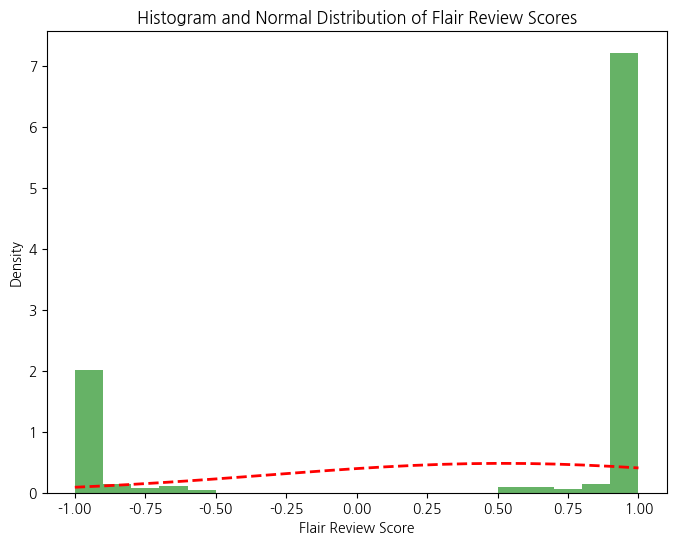

In [15]:
# Flair_Review_score 기준 히스토그램과 정규분포 곡선 그리기
flair_review_scores = comparison_df['Flair_Review_score']

# 히스토그램 그리기
plt.figure(figsize=(8, 6))
count, bins, ignored = plt.hist(flair_review_scores, bins=20, density=True, alpha=0.6, color='green')

# 정규분포 곡선 그리기
mu, std = norm.fit(flair_review_scores)  # 평균과 표준편차 계산
plt.plot(bins, norm.pdf(bins, mu, std), 'r--', linewidth=2)

plt.title('Histogram and Normal Distribution of Flair Review Scores')
plt.xlabel('Flair Review Score')
plt.ylabel('Density')
plt.show()

In [16]:
comparison_data = data.copy()

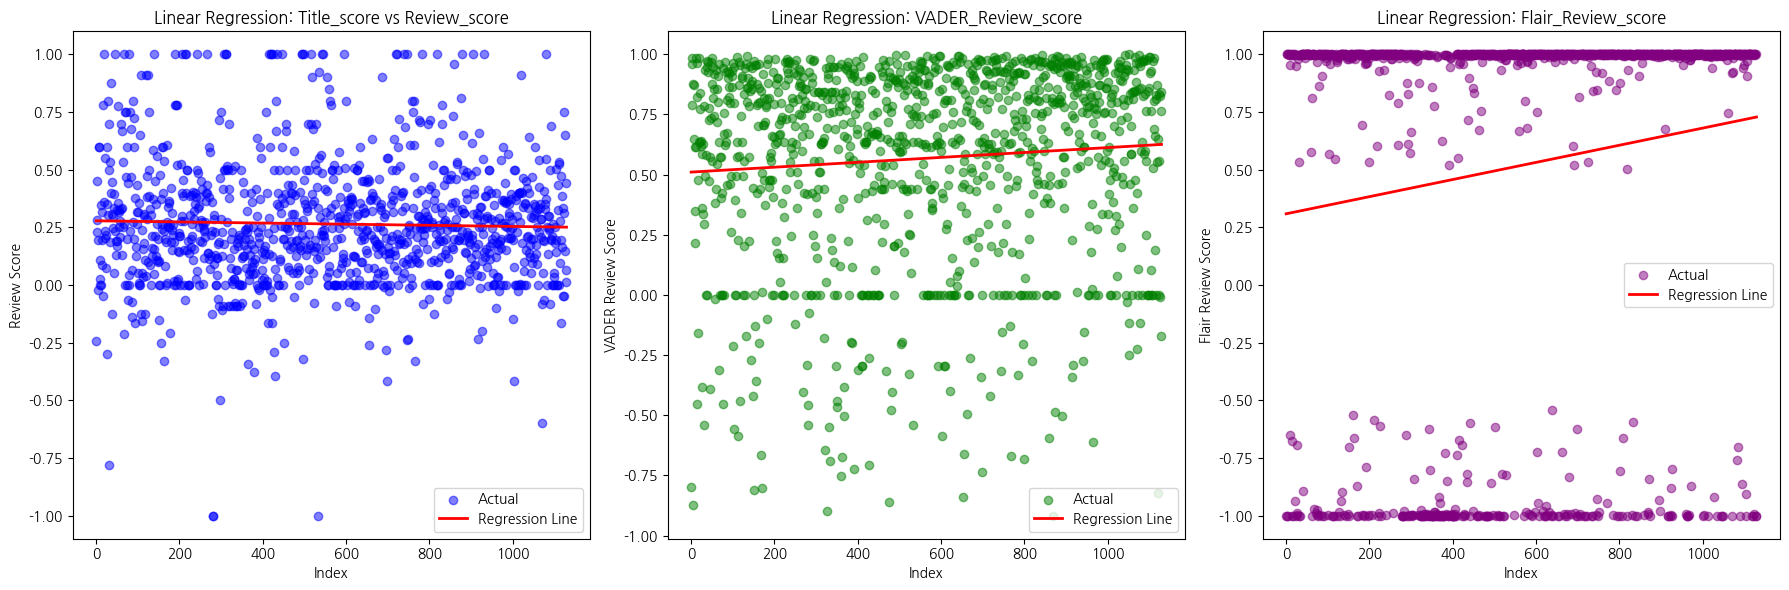

In [17]:
from sklearn.linear_model import LinearRegression
import numpy as np

# 데이터를 준비합니다.
X = np.arange(len(comparison_data)).reshape(-1, 1)  # 인덱스를 X로 사용

# 3개의 Review_score에 대해 각각 선형 회귀 모델을 생성하고, 회귀선을 그립니다.
plt.figure(figsize=(18, 6))

# Title_score vs Review_score
plt.subplot(1, 3, 1)
y = comparison_data['Review_score']
model = LinearRegression().fit(X, y)
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Title_score vs Review_score')
plt.xlabel('Index')
plt.ylabel('Review Score')
plt.legend()

# VADER_Title_score vs VADER_Review_score
plt.subplot(1, 3, 2)
y = comparison_data['VADER_Review_score']
model = LinearRegression().fit(X, y)
plt.scatter(X, y, color='green', alpha=0.5, label='Actual')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: VADER_Review_score')
plt.xlabel('Index')
plt.ylabel('VADER Review Score')
plt.legend()

# Flair_Title_score vs Flair_Review_score
plt.subplot(1, 3, 3)
y = comparison_data['Flair_Review_score']
model = LinearRegression().fit(X, y)
plt.scatter(X, y, color='purple', alpha=0.5, label='Actual')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Flair_Review_score')
plt.xlabel('Index')
plt.ylabel('Flair Review Score')
plt.legend()

plt.tight_layout()
plt.show()

Review_score: 원본 감정 점수는 다양한 감정 표현을 포함하고 있으며, 데이터 분포가 넓게 퍼져 있습니다. 회귀선은 이러한 분포를 일반화하여 감정 점수가 약간의 증가 또는 감소 경향을 보인다

VADER_Review_score: VADER는 리뷰 감정을 평가할 때, 중립적 감정에 가까운 점수를 자주 부여합니다. 이는 VADER가 극단적인 감정보다는 중립적인 텍스트에 대해 더 적절한 모델일 수 있음을 나타냅니다.

Flair_Review_score: Flair 모델은 감정 표현에 대해 더 극단적인 점수를 부여하며, 감정이 명확하게 긍정적이거나 부정적인 텍스트에서 더 강하게 반응합니다. 이는 Flair 모델이 문맥을 더 깊이 이해하고, 더 극단적인 감정 표현을 잘 포착할 수 있음을 보여줍니다.

In [10]:
filtered_data = data[data['Bottle_name'].str.contains('Yamazaki Mizunara 18')]

In [15]:
graph_data = filtered_data[['Review_score', 'VADER_Review_score', 'Flair_Review_score']]

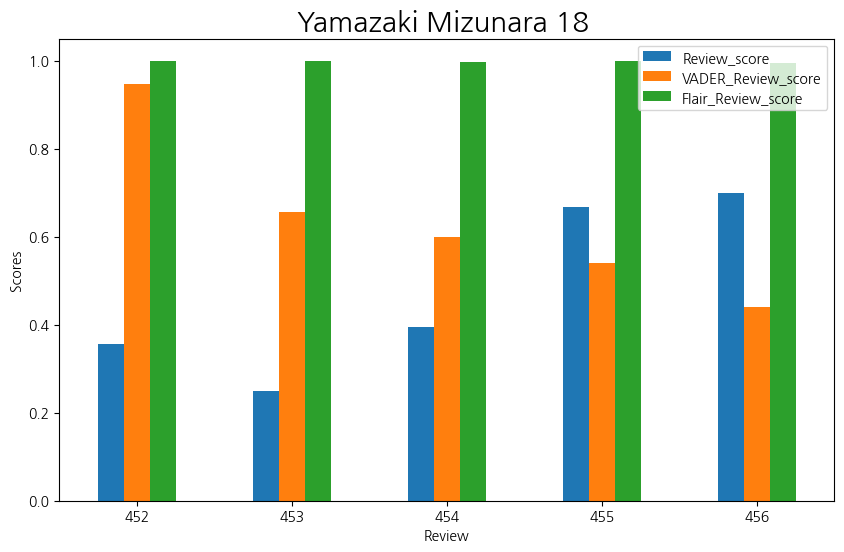

In [20]:
graph_data.plot(kind='bar', figsize=(10, 6))
plt.title('Yamazaki Mizunara 18 ', fontsize=20)
plt.xlabel('Review')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()